# Case Based Reasoning - Categorical Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df_cat_knn = pd.read_csv('citrus.csv')

In [3]:
df_cat_knn.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df_cat_knn.dropna(axis=0,inplace = True)
df_cat_knn['name'].replace({'orange':0,'grapefruit':1},inplace=True)

In [5]:
df_cat_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  int64  
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 546.9 KB


In [6]:
df_cat_knn.describe()

,name,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,9.975685,175.050792,153.847800,76.010600,11.363200
std,0.500025,1.947844,29.212119,10.432954,11.708433,9.061275
min,0.000000,2.960000,86.760000,115.000000,31.000000,2.000000
25%,0.000000,8.460000,152.220000,147.000000,68.000000,2.000000
50%,0.500000,9.980000,174.985000,154.000000,76.000000,10.000000
75%,1.000000,11.480000,197.722500,161.000000,84.000000,17.000000
max,1.000000,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
y_cat_knn = df_cat_knn['name']
x_cat_knn = df_cat_knn.drop(['name'],axis=1)

In [8]:
x_cat_knn

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [9]:
y_cat_knn

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: name, Length: 10000, dtype: int64

In [10]:
x_cat_knn = pd.DataFrame(StandardScaler().fit_transform(x_cat_knn), columns=x_cat_knn.columns, index = x_cat_knn.index)
x_cat_knn

,diameter,weight,red,green,blue
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [11]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\leejo\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [12]:
# sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_cat_knn_shuffled = sklearn.utils.shuffle(x_cat_knn, random_state=42)
y_cat_knn_shuffled =sklearn.utils.shuffle(y_cat_knn, random_state=42)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(x_cat_knn_shuffled, y_cat_knn_shuffled)

In [13]:
X_resampled

,diameter,weight,red,green,blue
0,0.217849,0.215305,1.164848,2.817717,0.180646
1,-1.019478,-1.013356,-0.368831,-0.342557,-1.033372
2,0.294861,0.271791,-0.272976,0.682397,-1.033372
3,0.063825,0.077342,0.589719,-0.342557,-1.033372
4,-1.548295,-1.509065,-0.177121,0.767810,-1.033372
...,...,...,...,...,...
9995,1.003372,1.017067,0.398009,1.280287,-0.923007
9996,0.962299,0.972221,-1.423235,-0.513382,0.953203
9997,1.285750,1.290598,-1.231525,-0.855033,0.401376
9998,0.895556,0.908888,-1.039815,0.084507,-0.150450


In [14]:
y_cat_knn_shuffled

6252    1
4684    0
1731    0
4742    0
4521    0
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: name, Length: 10000, dtype: int64

In [15]:
print(y_resampled.value_counts()) # {'orange':0,'grapefruit':1}

1    5000
0    5000
Name: name, dtype: int64


In [16]:
# train: validation = 7:3 분할
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 2021)

In [17]:
print(len(training_data))
print(len(training_labels))

print(len(validation_data))
print(len(validation_labels))

7000
7000
3000
3000


In [18]:
# knn 모델 (k=3)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights="distance", metric="euclidean")

In [19]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [20]:
classifier.predict(validation_data)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
print(classifier.score(validation_data, validation_labels)) # accuracy

0.912


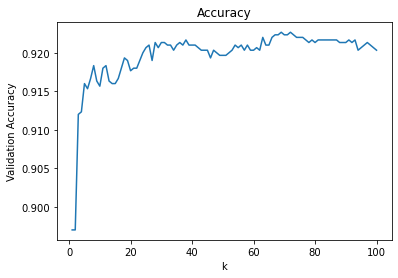

In [22]:
# knn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_list = range(1,101) # k= 1~100까지 조절
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="euclidean")
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy")
plt.show()


In [23]:
accuracies.index(max(accuracies))

68

In [24]:
# knn 모델 (k=69) - 제일 accuracy가 높도록
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 69, weights="distance", metric="euclidean")

classifier.fit(training_data, training_labels)

# n_neighbors: 인접한 이웃 수 설정
# weights(default='uniform'): 'distance'로 설정하면, 분류할 때 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
# metric(default='minkowski'): 거리계산의 척도 (minkowski, euclidean, mahalanobis 등)

KNeighborsClassifier(metric='euclidean', n_neighbors=69, weights='distance')

In [25]:
classifier.predict(validation_data)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [26]:
print(classifier.score(validation_data, validation_labels)) # accuracy

0.9226666666666666


In [27]:
# Confusion Matrix 방법1
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels, classifier.predict(validation_data))


array([[1388,  126],
       [ 106, 1380]], dtype=int64)

In [28]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(np.array(validation_labels), name='Actual') # validation_labels가 dataframe형태이므로 array형태로
y_pred = pd.Series(classifier.predict(validation_data), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

df_confusion

Predicted,0,1
Actual,,
0,1388,126
1,106,1380
